In [10]:
import os
import pandas as pd

# Directory containing the .xyz files to analyze 
directory = '/home/mfi/Desktop/mfi/full_simulations/3_Guest/'

# Save lattice parameters in separate dataframe
latticefilename = 'MIL68Ga-3rdguest-10.xyz'
lattice = pd.read_csv(os.path.join(directory, latticefilename), delimiter='\s+', header=None, skiprows=range(2, 400000), nrows=1)

numAtoms = lattice[0][0] - 1

#guest_indices = [685, 686, 687, 688, 689, 690]#1
#guest_indices = [723, 724, 722, 721, 725, 726, 685, 686, 687, 688, 689, 690]#2
guest_indices = [723, 724, 722, 721, 725, 726, 685, 686, 687, 688, 689, 690, 757, 758, 759, 760, 761, 762]

dfs = []

# Loop through xyz files, create dataframes from them, clean them up, add indices and add them to the list of dataframes
for i, filename in enumerate(sorted(os.listdir(directory))):
    if filename.endswith('.xyz') and filename.startswith('MIL68Ga-2ndguest'):
        file_path = os.path.join(directory, filename)
        df = pd.read_csv(file_path, delimiter='\s+', header=None, skiprows=1)
        df['run'] = filename
        # drop all rows that are NaN
        df = df[~df.iloc[:, 1].isna()]
        # drop all rows that are an X element
        df = df[df[0] != 'X']
        # reset the Index of the dataframe
        df.reset_index(drop=True, inplace=True)
        # add cleanedIndex to each row representing its index in the simulation, going from 1 to numAtoms then start at 1 again
        df['cleanedIndex'] = (df.index) % (numAtoms) + 1
        #drop the entire row if the cleanedIndex is not in the guest_indices list
        df = df[df['cleanedIndex'].isin(guest_indices)]
        # append to the list of dataframes
        dfs.append(df)
        
# Concatenate all dataframes into one
df = pd.concat(dfs, ignore_index=True)

print(df)



         0       1       2       3                      run  cleanedIndex
0        C -1.7597 -6.0669 -2.7087  MIL68Ga-2ndguest-09.xyz           685
1        C -3.1439 -6.3472 -3.0330  MIL68Ga-2ndguest-09.xyz           686
2        C -3.6173 -6.4345 -4.3004  MIL68Ga-2ndguest-09.xyz           687
3        C -2.6674 -6.4600 -5.3396  MIL68Ga-2ndguest-09.xyz           688
4        C -1.2794 -6.2023 -5.0823  MIL68Ga-2ndguest-09.xyz           689
...     ..     ...     ...     ...                      ...           ...
2999995  C  6.1048  1.0637  5.1101  MIL68Ga-2ndguest-18.xyz           722
2999996  C  6.2067  0.8367  3.7420  MIL68Ga-2ndguest-18.xyz           723
2999997  C  5.7514  1.8334  2.8577  MIL68Ga-2ndguest-18.xyz           724
2999998  C  5.1575  3.0680  3.3505  MIL68Ga-2ndguest-18.xyz           725
2999999  C  4.9533  3.2208  4.7772  MIL68Ga-2ndguest-18.xyz           726

[3000000 rows x 6 columns]


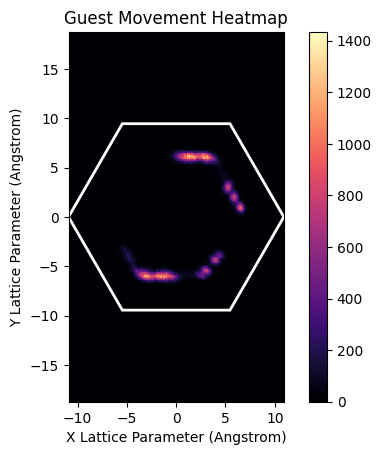

In [11]:
lattice_x = lattice[1][0]
lattice_y = lattice[2][0]

# Save second and third column of dataframe
x_values = df.iloc[:, 1]
y_values = df.iloc[:, 2]

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Adjust x-axis range and center it at zero
plt.hist2d(x_values, y_values, bins=500, cmap='magma', range=[[-lattice_x/2, lattice_x/2], [-lattice_y/2, lattice_y/2]])
plt.colorbar()
plt.xlabel('X Lattice Parameter (Angstrom)')
plt.ylabel('Y Lattice Parameter (Angstrom)')
plt.title('Guest Movement Heatmap')

hexagon = patches.RegularPolygon((0, 0), numVertices=6, radius=lattice_x/2, edgecolor='white', facecolor='none', linewidth=2, orientation=np.pi/2)
plt.gca().add_patch(hexagon)

plt.gca().set_aspect('equal')  # Set aspect ratio to 'equal'+
plt.savefig("/home/mfi/Desktop/mfi/full_simulations/2_Guest/HeatMap2Guest.png")

plt.show()



0         -4.3161
1         -3.5777
2         -4.2588
3         -5.6698
4         -6.3816
            ...  
3331129   -2.5991
3331130   -1.4659
3331131   -0.2548
3331132   -0.2442
3331133   -1.4609
Name: 3, Length: 3331134, dtype: float64


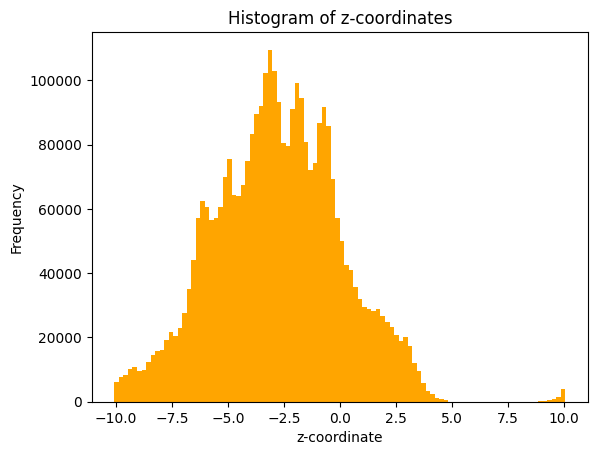

In [12]:
z_lattice = lattice[3][0]
z_values = df.iloc[:, 3]
print(z_values)

#Plot a histogram of the z values
plt.hist(z_values, bins=100, color='orange' ,range=[-z_lattice/2, z_lattice/2])
plt.xlabel('z-coordinate')
plt.ylabel('Frequency')
plt.title('Histogram of z-coordinates')
plt.savefig("/home/mfi/Desktop/mfi/images/Histogram2Guest.png")

plt.show()



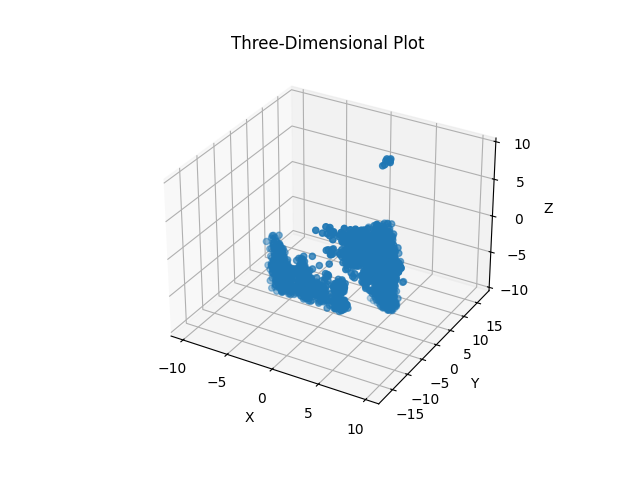

In [13]:
%matplotlib widget
# Create a new figure and axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot every thousandth step
ax.scatter(x_values[::1000], y_values[::1000], z_values[::1000])

# Set ranges to lattice values
ax.set_xlim(-lattice_x/2, lattice_x/2)
ax.set_ylim(-lattice_y/2, lattice_y/2)
ax.set_zlim(-z_lattice/2, z_lattice/2)


# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Three-Dimensional Plot')

# Show the plot
plt.show()